In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import re
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptop-price-dataset-april-2024/raw_ebay.csv
/kaggle/input/laptop-price-dataset-april-2024/cleaned.csv


In [2]:
df = pd.read_csv('/kaggle/input/laptop-price-dataset-april-2024/raw_ebay.csv')

In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3981 entries, 0 to 3980
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Brand                3949 non-null   object 
 1   Product_Description  3980 non-null   object 
 2   Screen_Size          3785 non-null   object 
 3   RAM                  3730 non-null   object 
 4   Processor            3880 non-null   object 
 5   GPU                  3247 non-null   object 
 6   GPU_Type             3258 non-null   object 
 7   Resolution           3320 non-null   object 
 8   Condition            3981 non-null   object 
 9   Price                3980 non-null   float64
dtypes: float64(1), object(9)
memory usage: 311.1+ KB
None
             Price
count  3980.000000
mean    521.743198
std     241.283545
min       0.000000
25%     324.562500
50%     498.850000
75%     700.000000
max     999.990000


In [4]:
df = df.dropna()

In [5]:
def convert_to_numeric(value):
    if isinstance(value, str):
        value = value.rstrip('.')
        numeric_value = re.sub(r'[^0-9.]', '', value)
        if numeric_value:
            return float(numeric_value)
    return None

In [6]:
df['Screen_Size'] = df['Screen_Size'].apply(convert_to_numeric)
df['RAM'] = df['RAM'].apply(lambda x: convert_to_numeric(x.split(' ')[0]) if isinstance(x, str) else None)
df['Price'] = df['Price'].apply(lambda x: convert_to_numeric(str(x)) if not pd.isnull(x) else None)

In [7]:
df = df.dropna(subset=['Screen_Size', 'RAM', 'Price'])

In [8]:
print(df.dtypes)

Brand                   object
Product_Description     object
Screen_Size            float64
RAM                    float64
Processor               object
GPU                     object
GPU_Type                object
Resolution              object
Condition               object
Price                  float64
dtype: object


# Price distribution

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


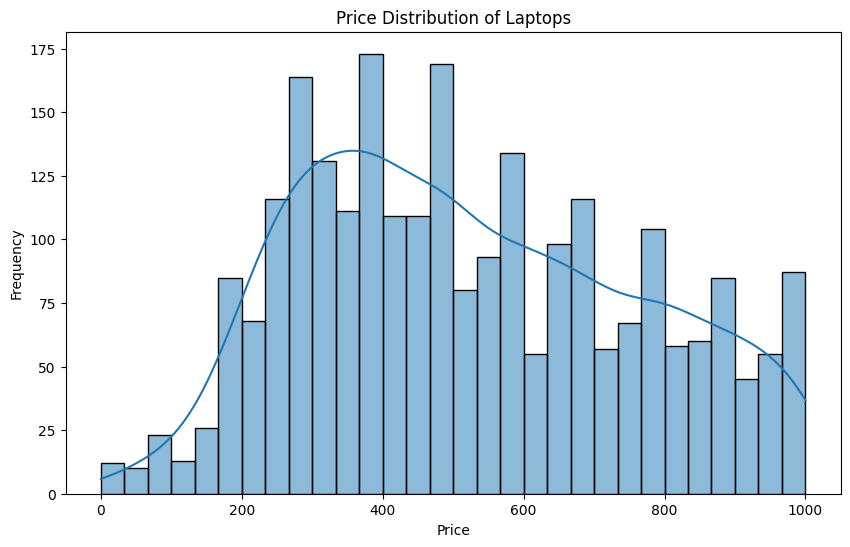

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Price Distribution of Laptops')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot for Price by Brand

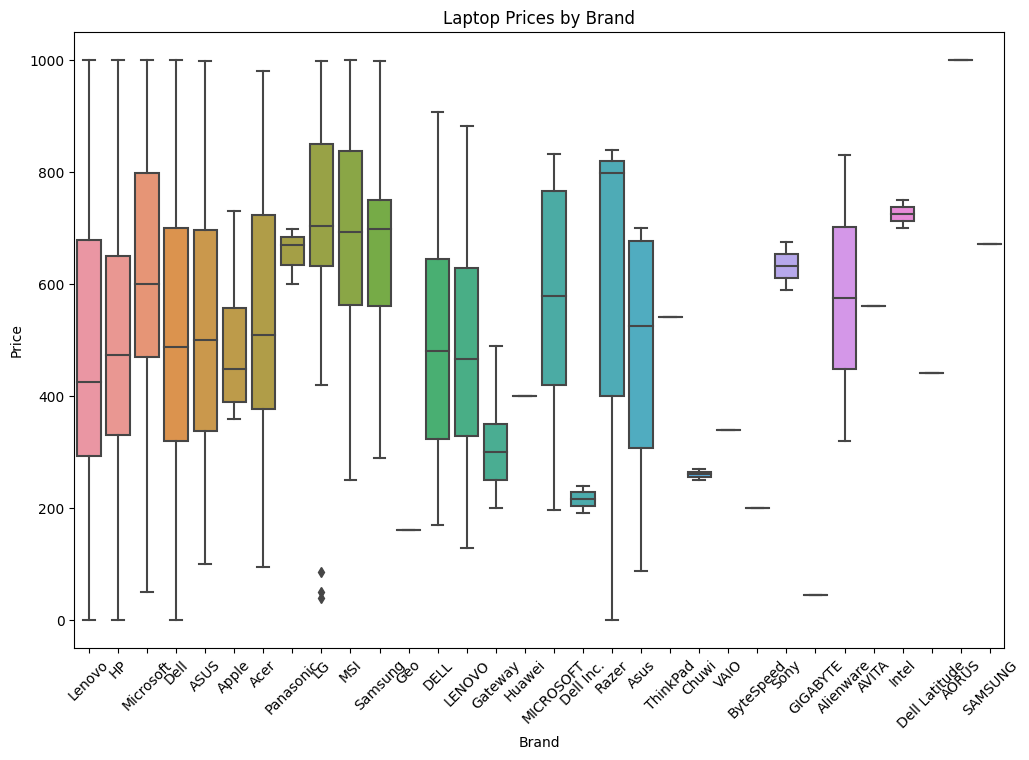

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Brand', y='Price', data=df)
plt.title('Laptop Prices by Brand')
plt.xticks(rotation=45)
plt.show()

# Pairplot for selected features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


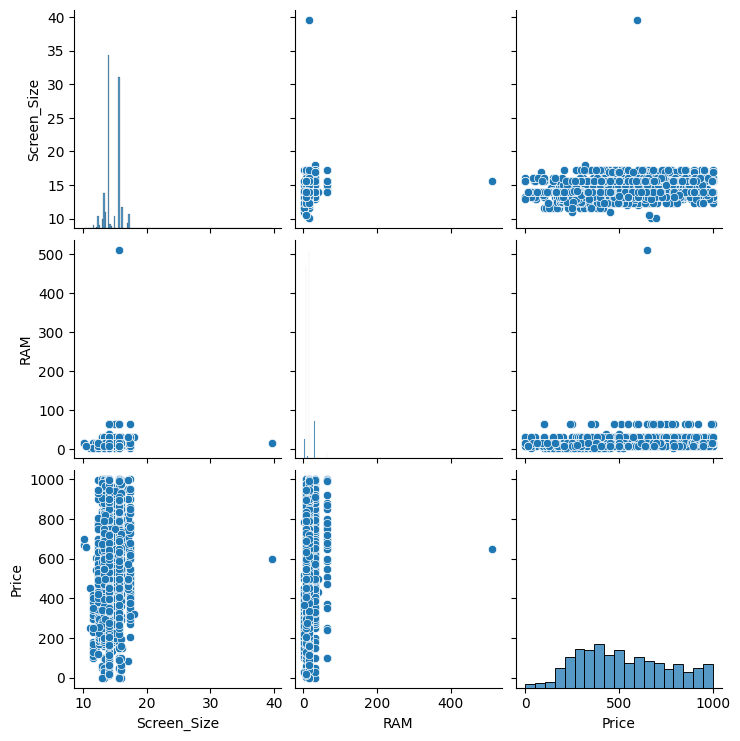

In [11]:
selected_features = ['Screen_Size', 'RAM', 'Price']
sns.pairplot(df[selected_features])
plt.show()

In [12]:
features = df[['Screen_Size', 'RAM', 'Price']]

# Standardize the features

In [13]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply PCA for dimensionality reduction

In [14]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Apply KMeans clustering

In [15]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_features)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
df['Cluster'] = clusters

# Visualize the clusters

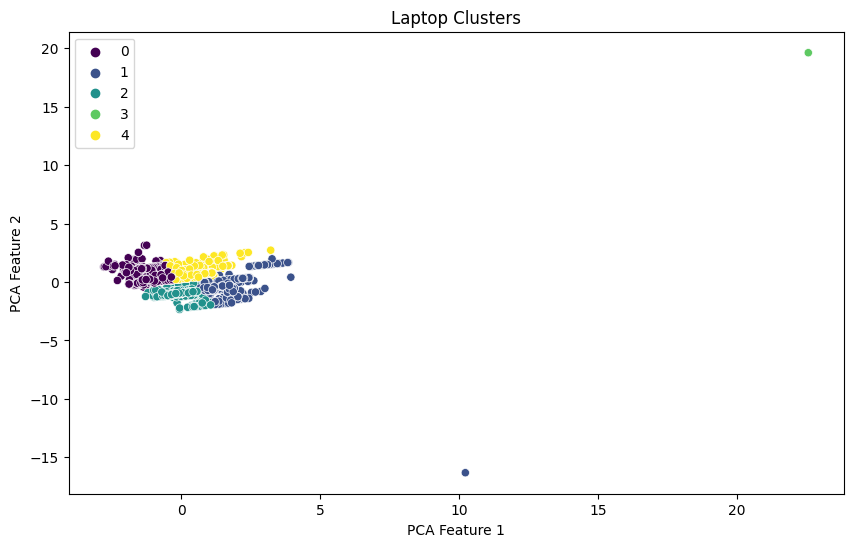

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=clusters, palette='viridis')
plt.title('Laptop Clusters')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()

# Function to recommend laptops based on cluster

In [18]:
def recommend_laptops(laptop_index, num_recommendations=5):
    cluster = df.loc[laptop_index, 'Cluster']
    recommendations = df[df['Cluster'] == cluster].sort_values('Price').head(num_recommendations)
    return recommendations

# Example usage of recommendation function

In [19]:
laptop_index = 0  
recommended_laptops = recommend_laptops(laptop_index)
print(recommended_laptops)

       Brand                                Product_Description  Screen_Size  \
2104   Razer  Razer Blade 16" (1TB SSD, Intel Core i9 13th G...         16.0   
1627    Dell  Dell XPS 15 9530 15.6" (1TB SSD, Intel Core i9...         15.6   
2884      HP  HP Envy x360 15-ed0003ca 15.6" (1TB SSD, Intel...         15.6   
2818  Lenovo  NEW Lenovo 82SF000MUS IdeaPad 5 15IAL7 15.6" N...         15.6   
3797      LG  New LG Gram 16Z90R 16'' WQXGA Touchscreen Lapt...         16.0   

       RAM                Processor                       GPU  \
2104  16.0  Intel Core i9 13th Gen.   NVIDIA GeForce RTX 4070   
1627  32.0  Intel Core i9 13th Gen.   NVIDIA GeForce RTX 4060   
2884  16.0  Intel Core i7 10th Gen.  Intel Iris Plus Graphics   
2818   8.0  Intel Core i7 12th Gen.    Intel Iris Xe Graphics   
3797  16.0  Intel Core i7 13th Gen.    Intel Iris Xe Graphics   

                          GPU_Type   Resolution Condition  Price  Cluster  
2104            Dedicated Graphics  2560 x 1600     